<a href="https://colab.research.google.com/github/msk1097/ML-Beginners/blob/master/California_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import standard packages 

import pandas as pd
import numpy as np
import os

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving housing.csv to housing.csv


In [0]:
import io 
housing = pd.read_csv(io.BytesIO(uploaded['housing.csv']))

In [4]:
# checking for missing values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# displaying the categories in this feature
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# showing the summary of all numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


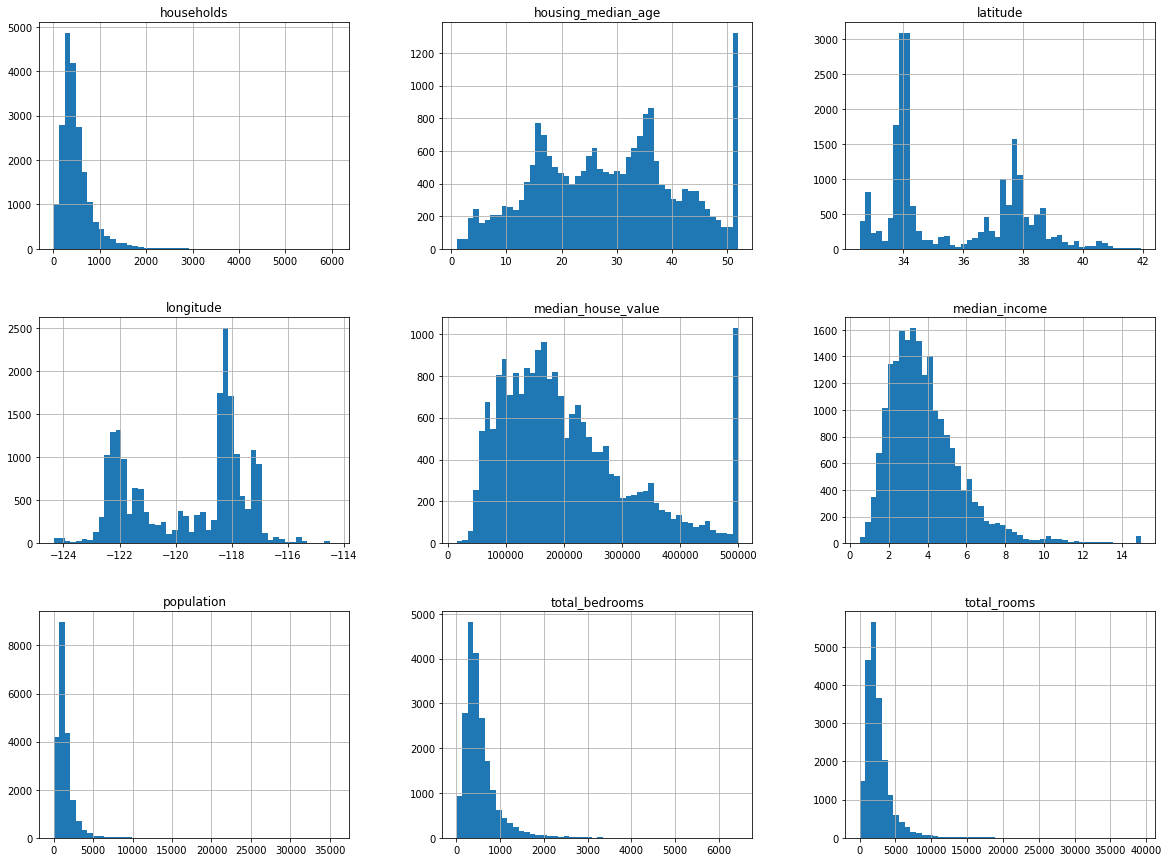

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# checking the graphical rep of the whole dataset(only numerical attributes)
housing.hist(bins=50,figsize=(20,15))
plt.show()
# slightly over 800 districts have a median_house_value equal to about $500,000

In [0]:

# splitting training data to train set and test set
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

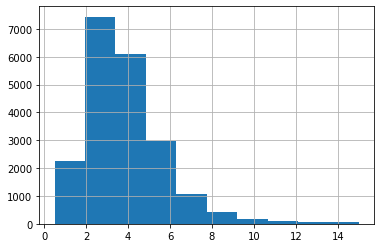

In [9]:
# looking at the median income histogram closely in each district
housing['median_income'].hist()
plt.show()

In [0]:
# creating categories for median income to rep them well using stratified sampling
# limiting no of categories by dividing by 1.5
housing['income_cat']=np.ceil(housing['median_income']/1.5)

In [11]:
# turning all those above 5 as 5.0
housing['income_cat'].where(housing['income_cat']< 5,5.0,inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [0]:
# now the stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [13]:
strat_train_set.head()
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0


In [14]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [0]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [16]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [0]:
for set in (strat_train_set,strat_test_set):
    set.drop(['income_cat'],axis=1,inplace=True)

# **Discover and Visualize the Data to Gain Insights**

In [18]:
# creating a copy of the training set 
housing_training=strat_train_set.copy()
housing_training.shape

(16512, 10)

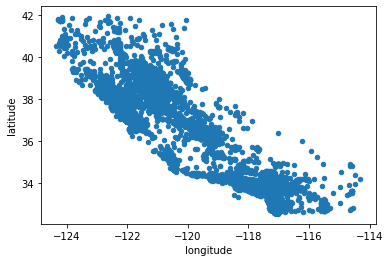

In [19]:
# visualizing the data
housing_training.plot(kind='scatter',x='longitude',y='latitude')

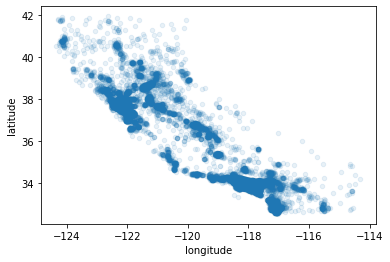

In [20]:
housing_training.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

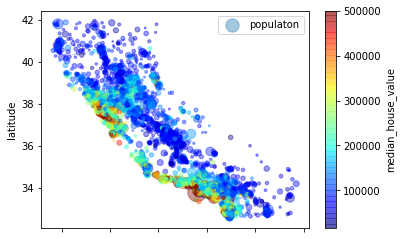

In [21]:
# better visualizations related with population and prices
# d bigger a bubble,d bigger d population of a district
housing_training.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
                     s=housing['population']/100,label='populaton',
                     c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [22]:
# each attributes correlates with median_house_value
corr_matrix=housing_training.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
# close to 1 for strong positive correlation ,0 for no linear correlation, -1 for strong negative correlation

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Text(0.5, 1, 'Correlation Matrix')

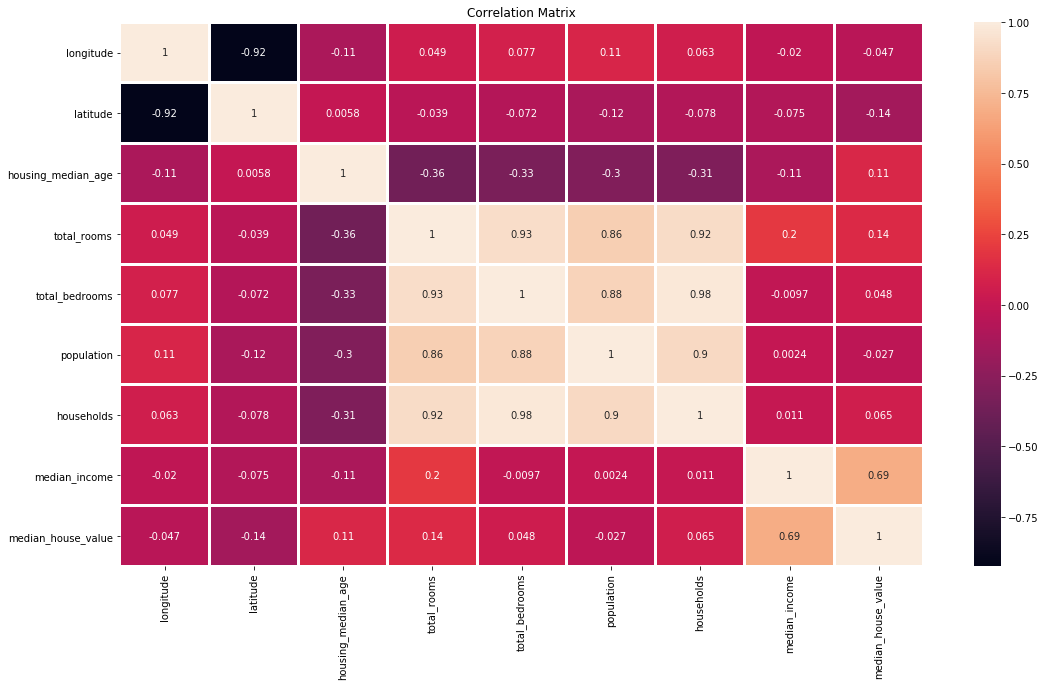

In [23]:
# attributes correlation
import seaborn as sns
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(corr_matrix,linewidths=2.0,ax=ax,annot=True)
ax.set_title('Correlation Matrix')

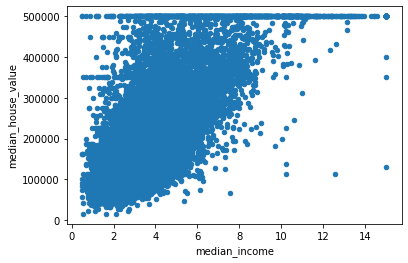

In [24]:
# so far d most promising attribute to predict median_house_value is median_income
housing_training.plot(kind='scatter',x='median_income',y='median_house_value')

In [0]:
# attribute combinations
housing_training['population_per_household']=housing_training['population']/housing_training['households']
housing_training['rooms_per_household']=housing_training['total_rooms']/housing_training['households']
housing_training['bedroom_per_rooms']=housing_training['total_bedrooms']/housing_training['total_rooms']

In [26]:
# looking at the correlation matrix again
corr_matrix=housing_training.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroom_per_rooms          -0.259984
Name: median_house_value, dtype: float64

**# Prepare the data for Machine Learning algorithms**

In [0]:
housing_predictors=strat_train_set.drop('median_house_value',axis=1)
housing_target=strat_train_set['median_house_value'].copy()

In [0]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [0]:
# imputer can handle missing values for d whole dataset bt works only for numerical attributes 
housing_num=housing_predictors.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)
a=imputer.transform(housing_num)
housing_clean=pd.DataFrame(a,columns=housing_num.columns)

In [32]:
# data is now free of missing values
housing_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [33]:
#  the categorical attribute ocean_proximity was left out
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing_predictors['ocean_proximity']
housing_cat_int_encoded=encoder.fit_transform(housing_cat)
housing_cat_int_encoded

#convert d integer categorical values into one-hot vectors 
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_int_encoded.reshape(-1,1))
housing_cat_1hot

# we can still convert back to pandas dataframe using
# housing_cat_1hot.toarray()

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
# or we use straight conversions frm text to one-hot
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

creating custom transformers (using class) to add those extra attributes



In [0]:
from sklearn.base import BaseEstimator,TransformerMixin
# column index
rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6
class combinedattributesadder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        rooms_per_household=x[:,rooms_ix]/x[:,household_ix]
        population_per_household=x[:,population_ix]/x[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=x[:,bedrooms_ix]/x[:,rooms_ix]
            return np.c_[x,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[x,rooms_per_household,population_per_household]
attr_adder=combinedattributesadder(add_bedrooms_per_room=False)
housing_xtra=attr_adder.transform(housing_predictors.values)

In [36]:
housing_xtra=pd.DataFrame(housing_xtra,columns=list(housing_predictors.columns)+['rooms_per_household','population_per_household'])
housing_xtra.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


building a transformation pipeline



In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attr_adder',combinedattributesadder()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr=num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [0]:

# creating  the dataframe selector class
from sklearn.base import BaseEstimator,TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,x,y=None):
        return self
    def transform(self,x):
        return x[self.attribute_names].values

In [0]:
# joining transformations into a single pipeline
from sklearn.pipeline import FeatureUnion

num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer',SimpleImputer(strategy="median")),
    ('attr_adder',combinedattributesadder()),
    ('std_scaler',StandardScaler()),
    ])

cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('one_hot_encoder', OneHotEncoder(sparse=False))
])

full_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])

In [46]:
housing_prepared=full_pipeline.fit_transform(housing_predictors)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [47]:
housing_prepared.shape

(16512, 16)

# **SELECTING AND TRAINING A MODEL**


In [48]:
# 1)Linear Regression model
from sklearn.linear_model import LinearRegression

lg=LinearRegression()
lg.fit(housing_prepared,housing_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# using few instances from the training set
some_predictor_data=housing_predictors.iloc[:5]
some_target_data=housing_target.iloc[:5]
some_data_prepared=full_pipeline.transform(some_predictor_data)

print('Predictions:\t',lg.predict(some_data_prepared))
print('Target:\t\t',list(some_target_data))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Target:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [50]:
# measuring the error in this model

# 1)RMSE(root mean squared error)
from sklearn.metrics import mean_squared_error
all_housing_predictions=lg.predict(housing_prepared)
lg_mse=mean_squared_error(housing_target,all_housing_predictions)
lg_rmse=np.sqrt(lg_mse)
lg_rmse

68628.19819848923

In [51]:
# 2)mean absolute error 
from sklearn.metrics import mean_absolute_error
lg_mae=mean_absolute_error(housing_target,all_housing_predictions)
lg_mae

49439.89599001897

CONCLUSION: This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.

In [52]:
# 2) Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_target)

all_housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_target,all_housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

# **BETTER VALIDATION USING CROSS-VALIDATION**

In [53]:
# using ten folds 
from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg,housing_prepared,housing_target,
                      scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-scores)
# scoring function is actually the opposite of the MSE(a neg value) which is 
# why the preceding code computes -scores before calculating the square root.

def display_scores(scores):
    print('scores:',scores)
    print('mean:',scores.mean())
    print('standard_deviation:',scores.std())

display_scores(tree_rmse_scores)

scores: [68913.01161532 68540.91700169 71397.47580255 68271.15326179
 71004.59868519 74649.31026146 70333.94262863 71168.1099242
 77169.93898078 69019.61888974]
mean: 71046.80770513485
standard_deviation: 2715.9662719059675


In [54]:
# using cross-validation for the linear regression model

from sklearn.model_selection import cross_val_score

scores=cross_val_score(lg,housing_prepared,housing_target,
                      scoring='neg_mean_squared_error',cv=10)
lg_rmse_scores=np.sqrt(-scores)

def display_scores(scores):
    print('scores:',scores)
    print('mean:',scores.mean())
    print('standard_deviation:',scores.std())
    
display_scores(lg_rmse_scores)

scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean: 69052.46136345083
standard_deviation: 2731.674001798344


In [55]:
# trying out one last model...3) Random forest regressor 

from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_target)

all_housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_target,all_housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18673.578890488207

In [56]:

# using cross-validation
from sklearn.model_selection import cross_val_score

scores=cross_val_score(forest_reg,housing_prepared,housing_target,
                      scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores=np.sqrt(-scores)

def display_scores(scores):
    print('scores:',scores)
    print('mean:',scores.mean())
    print('standard_deviation:',scores.std())
    
display_scores(forest_rmse_scores)

scores: [49915.16605791 47540.62703285 50629.12455617 52127.51018601
 49954.98642044 53380.65954094 49102.44412211 47870.58533547
 53194.18093254 50348.69073039]
mean: 50406.39749148451
standard_deviation: 1908.4416641332787


In [57]:

# 4) Support vector machines

from sklearn.svm import SVR

svm_reg=SVR()
svm_reg.fit(housing_prepared,housing_target)

all_housing_predictions=svm_reg.predict(housing_prepared)
svm_mse=mean_squared_error(housing_target,all_housing_predictions)
svm_rmse=np.sqrt(svm_mse)
svm_rmse


118580.68301157995

In [58]:
# using cross-validation
from sklearn.model_selection import cross_val_score

scores=cross_val_score(svm_reg,housing_prepared,housing_target,
                      scoring='neg_mean_squared_error',cv=10)
svm_rmse_scores=np.sqrt(-scores)

def display_scores(scores):
    print('scores:',scores)
    print('mean:',scores.mean())
    print('standard_deviation:',scores.std())
    
display_scores(svm_rmse_scores)

scores: [111389.0681902  119541.25938571 116957.62830414 120447.19932481
 117618.15904234 122309.10351544 117634.40230741 121469.713921
 120343.01369623 118017.12860651]
mean: 118572.66762937943
standard_deviation: 2936.8775867949425


# **FINE-TUNING THE MODEL**

In [59]:
# 1)GridSearch
#  with random forest
from sklearn.model_selection import GridSearchCV

param_grid=[
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg=RandomForestRegressor()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                        scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [60]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [61]:
# best score
mse=grid_search.best_score_
rmse=np.sqrt(-mse)
rmse

49854.2322522308

In [62]:
# or check with..
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
# seeing all the results 
grid_results=grid_search.cv_results_
for mean_score,params in zip(grid_results['mean_test_score'],grid_results['params']):
    print(np.sqrt(-mean_score),params)

64081.446901224896 {'max_features': 2, 'n_estimators': 3}
55072.357066796154 {'max_features': 2, 'n_estimators': 10}
53003.66321928212 {'max_features': 2, 'n_estimators': 30}
60304.1136934512 {'max_features': 4, 'n_estimators': 3}
52726.39610049872 {'max_features': 4, 'n_estimators': 10}
50726.18913732831 {'max_features': 4, 'n_estimators': 30}
59259.69121456085 {'max_features': 6, 'n_estimators': 3}
51948.61330544894 {'max_features': 6, 'n_estimators': 10}
49973.744603698535 {'max_features': 6, 'n_estimators': 30}
59146.40572039409 {'max_features': 8, 'n_estimators': 3}
52136.85283194741 {'max_features': 8, 'n_estimators': 10}
49854.2322522308 {'max_features': 8, 'n_estimators': 30}
62781.52962515258 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54269.313655395425 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60580.71675078679 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53046.10884414755 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [64]:
# 2) Randomized search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_rnd={
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8),
}
forest_reg=RandomForestRegressor(random_state=42)

rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_rnd,
                              n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=42)
rnd_search.fit(housing_prepared,housing_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [65]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [66]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [67]:
#  seeing the results
rnd_results=rnd_search.cv_results_
for mean_score,params in zip(rnd_results['mean_test_score'],rnd_results['params']):
    print(np.sqrt(-mean_score),params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


In [68]:
# the importance of each feature in the grid search result
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([6.72042386e-02, 6.01367365e-02, 4.49814235e-02, 1.56170066e-02,
       1.53201461e-02, 1.50283326e-02, 1.47210798e-02, 3.46375808e-01,
       4.96864591e-02, 1.10960148e-01, 7.25970344e-02, 4.83873096e-03,
       1.76490648e-01, 7.27956884e-05, 1.91093993e-03, 4.05847198e-03])

In [69]:
# importance scores next to their corresponding attributes
extra_attribs=['rooms_per_household','pop_per_household','bedrooms_per_room']
cat_1hot_attribs=list(encoder.classes_)
attributes=num_attribs+extra_attribs+cat_1hot_attribs

sorted(zip(feature_importances,attributes),reverse=True)

[(0.34637580809019486, 'median_income'),
 (0.17649064772911818, 'INLAND'),
 (0.1109601483513762, 'pop_per_household'),
 (0.07259703443575376, 'bedrooms_per_room'),
 (0.06720423857106694, 'longitude'),
 (0.06013673654282534, 'latitude'),
 (0.049686459140802046, 'rooms_per_household'),
 (0.044981423540919115, 'housing_median_age'),
 (0.015617006554326513, 'total_rooms'),
 (0.015320146125072395, 'total_bedrooms'),
 (0.0150283325631165, 'population'),
 (0.01472107979622996, 'households'),
 (0.00483873096422525, '<1H OCEAN'),
 (0.004058471975438017, 'NEAR OCEAN'),
 (0.0019109399310903003, 'NEAR BAY'),
 (7.279568844474408e-05, 'ISLAND')]

apparently only one ocean_proximity category is really useful

# **EVALUATING THE SYSTEM ON THE TEST SET**

In [0]:
final_model_grid=grid_search.best_estimator_

x_test=strat_test_set.drop('median_house_value',axis=1)
y_test=strat_test_set['median_house_value'].copy()

x_test_prepared=full_pipeline.transform(x_test)
final_predictions=final_model_grid.predict(x_test_prepared)

final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [71]:
final_rmse

48226.25549650727

In [0]:
# 2)using fine_tuned rndsearch
final_model_rnd=rnd_search.best_estimator_

x_test=strat_test_set.drop('median_house_value',axis=1)
y_test=strat_test_set['median_house_value'].copy()

x_test_prepared=full_pipeline.transform(x_test)
final_predictions=final_model_rnd.predict(x_test_prepared)

final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [73]:
final_rmse

46910.92117024934

In [74]:
# saving the model
from sklearn.externals import joblib

joblib.dump(final_model_grid,'final_model_grd.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['final_model_grd.pkl']

In [75]:
joblib.dump(final_model_rnd,'final_model_rnd.pkl')

['final_model_rnd.pkl']